In [105]:
import numpy as np
import matplotlib.pyplot as plt

Определение функции 1

In [106]:
def f(x):
    return np.log10(x + 2) + x

Определение функции 2

In [107]:
def g(x):
    return np.power(x, 3) - 0.1 * np.power(x, 2) + 0.4 * np.abs(x) + 2

Границы отрезка и количество узлов

In [108]:
a = -1.5
b = 1.5
n = 10

Функция для создания узлов

In [109]:
def nodes(a, b, n, f):
    x_nodes = np.linspace(a, b, n)
    y_nodes = f(x_nodes)
    return x_nodes, y_nodes

Функция для вычисления квадратичного сплайна

In [ ]:
def spline(x_nodes, y_nodes, init):
    n = len(x_nodes) - 1
    h = np.diff(x_nodes)
    a = np.zeros(n)
    b = np.zeros(n)
    c = y_nodes[:-1]

    b[0] = init
    for i in range(n):
        if i > 0:
            b[i] = 2 * (y_nodes[i] - y_nodes[i - 1]) / h[i - 1] - b[i - 1]
        a[i] = (y_nodes[i + 1] - y_nodes[i] - b[i] * h[i]) / h[i] ** 2

    splines = []
    for i in range(n):
        a_i, b_i, c_i, x_i = a[i], b[i], c[i], x_nodes[i]
        def spline_fn(x, a=a_i, b=b_i, c=c_i, x0=x_i):
            return a * (x - x0) ** 2 + b * (x - x0) + c
        splines.append(spline_fn)

    return splines

Функция для вычисления ошибки интерполяции

In [111]:
def error(x_nodes, y_nodes, f, init, num=100):
    splines = spline(x_nodes, y_nodes, init)

    x_error = np.array([])
    y_error = np.array([])

    for i in range(len(x_nodes) - 1):
        x = np.linspace(x_nodes[i], x_nodes[i + 1], num)
        y_true = f(x)
        y_int = splines[i](x)
        error = np.abs(y_true - y_int)
        x_error = np.concatenate((x_error, x))
        y_error = np.concatenate((y_error, error))

    return x_error, y_error

Функция для вычисления максимальной ошибки в зависимости от количества узлов

In [112]:
def max_error(f, nod, init):
    grids = []
    grid_funcs = []
    errors = np.zeros(len(nod))
    for i in nod:
        x_nodes, y_nodes = nodes(a, b, i, f)
        grids.append(x_nodes)
        grid_funcs.append(y_nodes)

    for i in range(len(nod)):
        errors[i] += np.max(error(grids[i], grid_funcs[i], f, init, num=100)[1])

    return errors

Функция для вычисления максимальной ошибки в зависимости от производной

In [113]:
def max_error_div(f, nod, div):
    x_nodes, y_nodes = nodes(a, b, nod, f)
    errors = np.zeros(len(div))
    for i in range(len(div)):
        errors[i] += np.max(error(x_nodes, y_nodes, f, div[i], num=100)[1])

    return errors

Функция для вычисления производной

In [114]:
def deriv(f, x, h=1e-5):
    return (f(x + h) - f(x)) / h

Функция для вычисления ошибки интерполяции с возмущением данных

In [115]:
def perturbation_error(x_nodes, y_nodes, f, init, perturbation_percent, num=100):
    y_nodes_perturbed = y_nodes + y_nodes * np.random.uniform(-perturbation_percent, perturbation_percent, len(y_nodes))

    splines = spline(x_nodes, y_nodes_perturbed, init)

    x_error = np.array([])
    y_error = np.array([])

    for i in range(len(x_nodes) - 1):
        x = np.linspace(x_nodes[i], x_nodes[i + 1], num)
        y_true = f(x)
        y_int = splines[i](x)
        error = np.abs(y_true - y_int)
        x_error = np.concatenate((x_error, x))
        y_error = np.concatenate((y_error, error))

    return y_error

Функция для проведения эксперимента с боксплотом

In [116]:
def perturbation_experiment(f, a, b, nod, perturbations, init, num=100, trials=20):
    perturbation_errors = {p: [] for p in perturbations}

    for _ in range(trials):
        for p in perturbations:
            x_nodes, y_nodes = nodes(a, b, nod, f)
            error = perturbation_error(x_nodes, y_nodes, f, init, p, num)
            perturbation_errors[p].append(np.max(error))

    return perturbation_errors

Основная программа

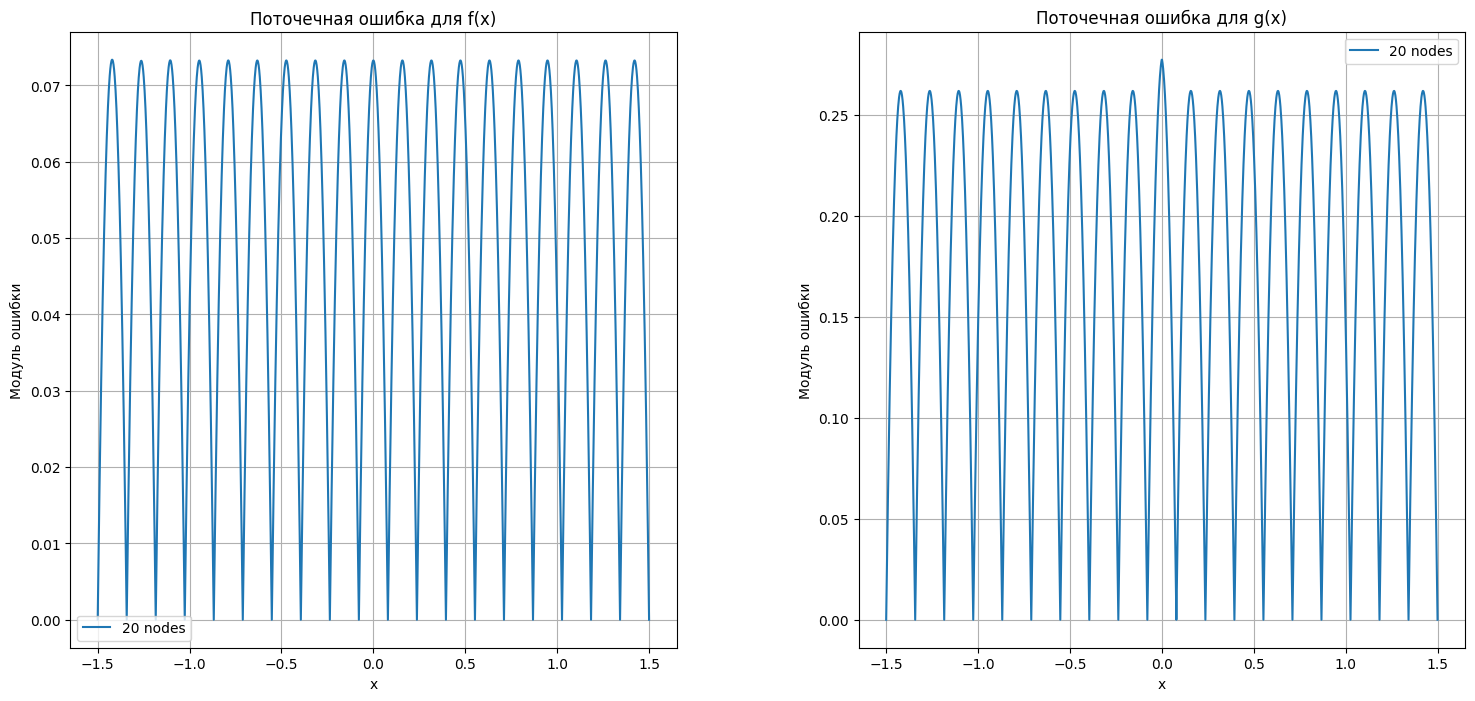

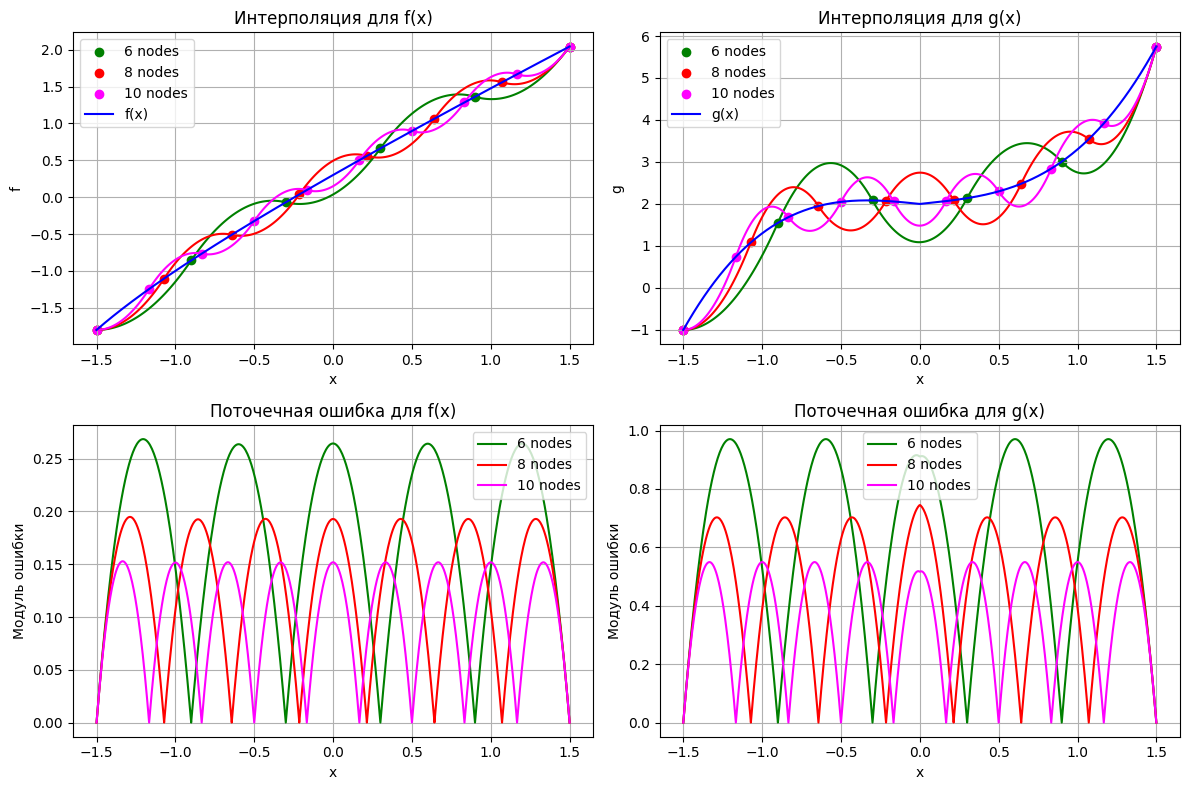

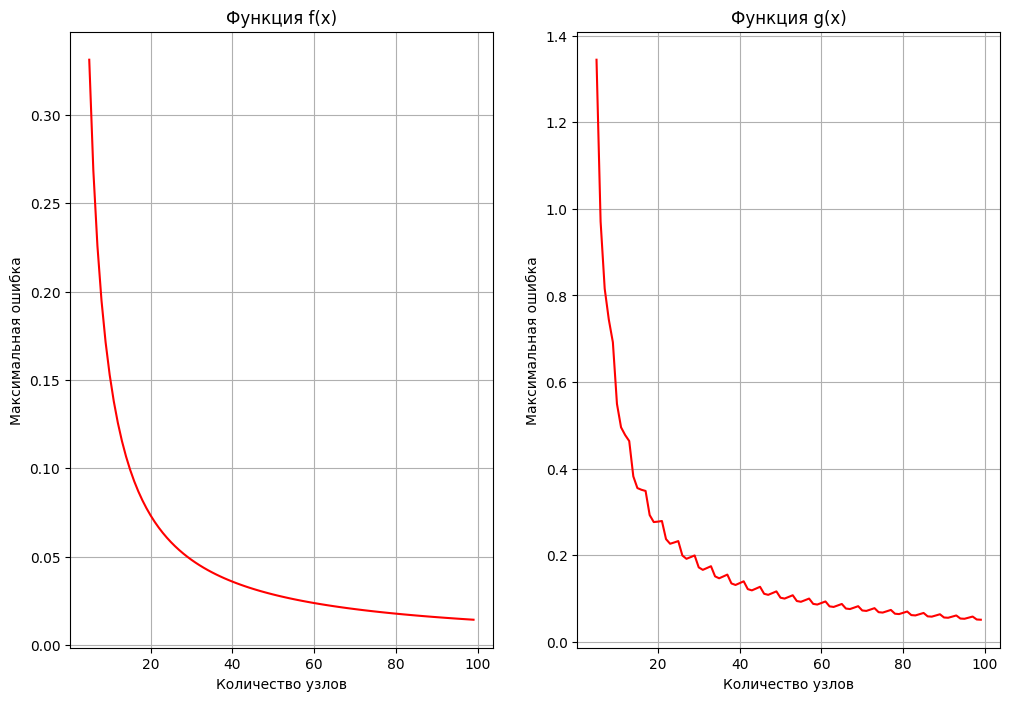

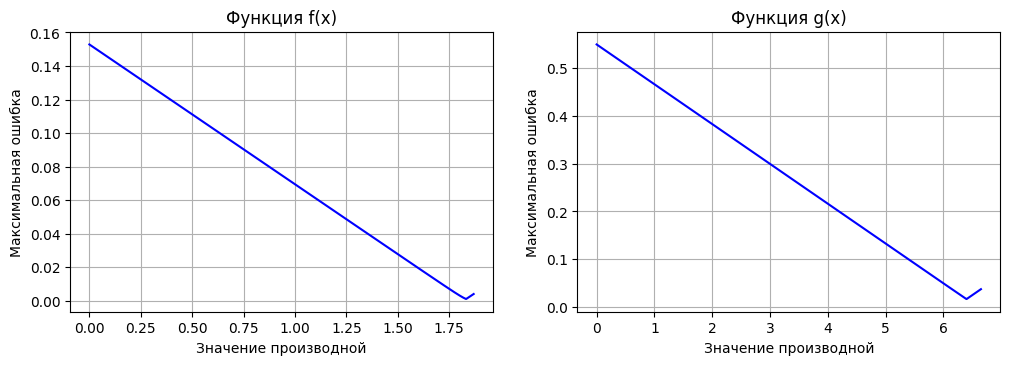

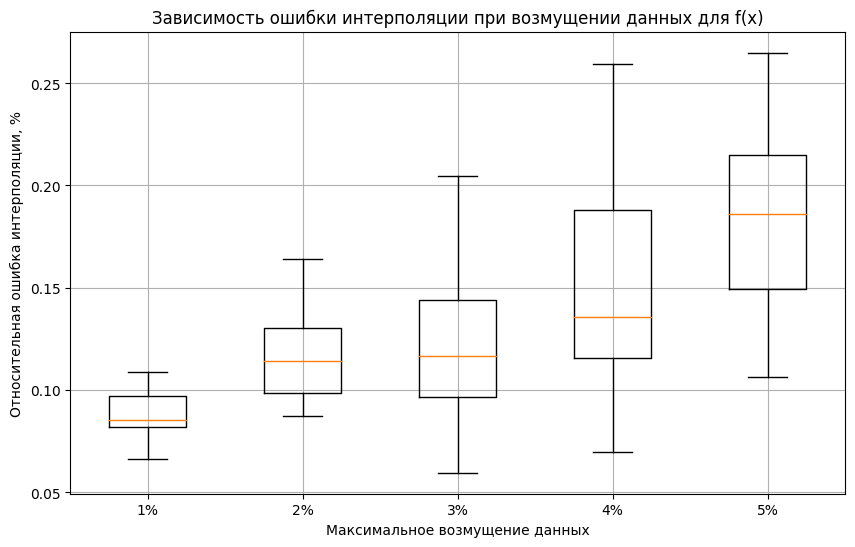

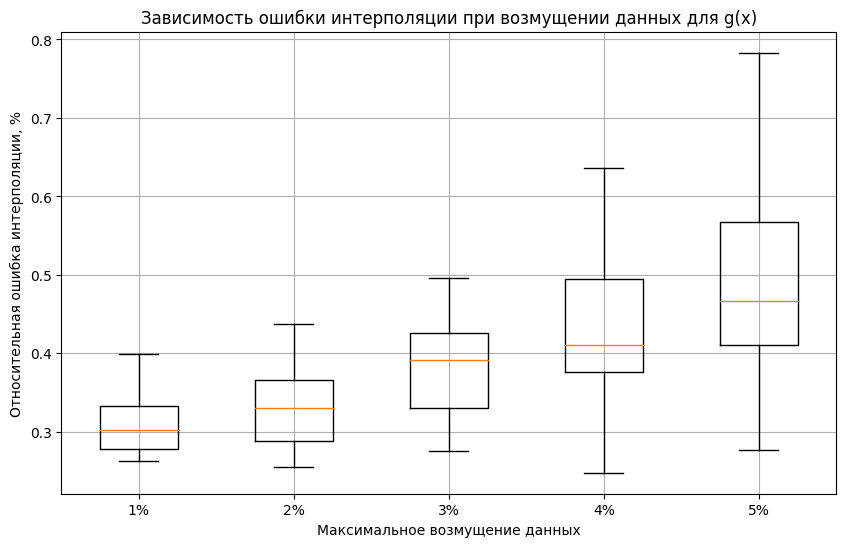

In [117]:
test_grid = np.linspace(a, b, 1000)
nod = np.arange(5, 100)
nodes_for_research = [6, 8, 10]
colors = ['cyan', 'green', 'brown', 'red', 'orange', 'magenta', 'red', 'blue', 'yellow', 'pink']
init = 0
perturbations = [0.01, 0.02, 0.03, 0.04, 0.05]

y1 = 0.073
y2 = 0.263

plt.figure(figsize=(18, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.subplot(1, 2, 1)
x_nodes, y_nodes = nodes(a, b, 20, f)
error_x, error_y = error(x_nodes, y_nodes, f, init, num=100)
plt.plot(error_x, error_y, label=f'20 nodes')
plt.grid()
plt.xlabel('x')
plt.legend()
plt.grid(True)
plt.ylabel('Модуль ошибки')
plt.title('Поточечная ошибка для f(x)')

plt.subplot(1, 2, 2)
x_nodes, y_nodes = nodes(a, b, 20, g)
error_x, error_y = error(x_nodes, y_nodes, g, init, num=100)
plt.plot(error_x, error_y, label=f'20 nodes')
plt.grid()
plt.xlabel('x')
plt.legend()
plt.grid(True)
plt.ylabel('Модуль ошибки')
plt.title('Поточечная ошибка для g(x)')

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in nodes_for_research:
    x_nodes, y_nodes = nodes(a, b, i, f)
    splines = spline(x_nodes, y_nodes, init)
    for j in range(len(x_nodes) - 1):
        x_vals = np.linspace(x_nodes[j], x_nodes[j+1], 100)
        y_vals = splines[j](x_vals)
        plt.plot(x_vals, y_vals, color=colors[i - 5])
    plt.scatter(x_nodes, y_nodes, color=colors[i - 5], label=f"{len(x_nodes)} nodes")

plt.plot(test_grid, f(test_grid), label='f(x)', color='blue')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('f')
plt.title('Интерполяция для f(x)')

plt.subplot(2, 2, 2)
for i in nodes_for_research:
    x_nodes, y_nodes = nodes(a, b, i, g)
    splines = spline(x_nodes, y_nodes, init)
    for j in range(len(x_nodes) - 1):
        x_vals = np.linspace(x_nodes[j], x_nodes[j+1], 100)
        y_vals = splines[j](x_vals)
        plt.plot(x_vals, y_vals, color=colors[i - 5])
    plt.scatter(x_nodes, y_nodes, color=colors[i - 5], label=f"{len(x_nodes)} nodes")

plt.plot(test_grid, g(test_grid), label='g(x)', color='blue')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('g')
plt.title('Интерполяция для g(x)')

plt.subplot(2, 2, 3)
for i in nodes_for_research:
    x_nodes, y_nodes = nodes(a, b, i, f)
    error_x, error_y = error(x_nodes, y_nodes, f, init, num=100)
    plt.plot(error_x, error_y, label=f'{i} nodes', color=colors[i - 5])
plt.grid()
plt.xlabel('x')
plt.legend()
plt.grid(True)
plt.ylabel('Модуль ошибки')
plt.title('Поточечная ошибка для f(x)')

plt.subplot(2, 2, 4)
for i in nodes_for_research:
    x_nodes, y_nodes = nodes(a, b, i, g)
    error_x, error_y = error(x_nodes, y_nodes, g, init, num=100)
    plt.plot(error_x, error_y, label=f'{i} nodes', color=colors[i - 5])
plt.grid()
plt.xlabel('x')
plt.legend()
plt.grid(True)
plt.ylabel('Модуль ошибки')
plt.title('Поточечная ошибка для g(x)')
plt.tight_layout()

errors_f_from_nodes = max_error(f, nod, init)
errors_g_from_nodes = max_error(g, nod, init)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(nod, errors_f_from_nodes, color='red')
plt.grid()
plt.xlabel('Количество узлов')
plt.ylabel('Максимальная ошибка')
plt.title('Функция f(x)')

plt.subplot(1, 2, 2)
plt.plot(nod, errors_g_from_nodes, color='red')
plt.grid()
plt.xlabel('Количество узлов')
plt.ylabel('Максимальная ошибка')
plt.title('Функция g(x)')

derivatives_f = np.linspace(deriv(f, a), 0, 1000)
derivatives_g = np.linspace(deriv(g, a), 0, 1000)

errors_f_from_derivative = max_error_div(f, 10, derivatives_f)
errors_g_from_derivative = max_error_div(g, 10, derivatives_g)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(derivatives_f, errors_f_from_derivative, color='blue')
plt.grid()
plt.xlabel('Значение производной')
plt.ylabel('Максимальная ошибка')
plt.title('Функция f(x)')

plt.subplot(2, 2, 2)
plt.plot(derivatives_g, errors_g_from_derivative, color='blue')
plt.grid()
plt.xlabel('Значение производной')
plt.ylabel('Максимальная ошибка')
plt.title('Функция g(x)')

perturbation_errors_f = perturbation_experiment(f, a, b, 20, perturbations, init)

plt.figure(figsize=(10, 6))
plt.boxplot([perturbation_errors_f[p] for p in perturbations], labels=[f'{int(p * 100)}%' for p in perturbations], showfliers=False)
plt.grid(True)
plt.xlabel('Максимальное возмущение данных')
plt.ylabel('Относительная ошибка интерполяции, %')
plt.title('Зависимость ошибки интерполяции при возмущении данных для f(x)')
plt.show()

perturbation_errors_g = perturbation_experiment(g, a, b, 20, perturbations, init)

plt.figure(figsize=(10, 6))
plt.boxplot([perturbation_errors_g[p] for p in perturbations], labels=[f'{int(p * 100)}%' for p in perturbations], showfliers=False)
plt.grid(True)
plt.xlabel('Максимальное возмущение данных')
plt.ylabel('Относительная ошибка интерполяции, %')
plt.title('Зависимость ошибки интерполяции при возмущении данных для g(x)')
plt.show()